### Asset Allocation and Statistical Analysis

**In this project, instead of us analysing individual stocks, we will create a perform to perform portfolio analysis such as calculating portfolio return, risk and sharpe ratio**

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import copy
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

### Import and load the dataset

In [2]:
stocks_data = pd.read_csv("stock.csv")
stocks_data.sample(5)

Date        AAPL          BA          T        MGM         AMZN  \
646   2014-08-08   94.739998  120.629997  34.470001  24.730000   316.799988   
1701  2018-10-16  222.149994  368.250000  32.389999  27.610001  1819.959961   
1476  2017-11-22  174.960007  265.149994  34.869999  33.450001  1156.160034   
1329  2017-04-26  143.679993  181.710007  40.439999  29.790001   909.289978   
1769  2019-01-25  157.759995  364.200012  30.660000  28.700001  1670.569946   

             IBM        TSLA         GOOG        sp500  
646   186.630005  248.130005   567.212708  1931.589966  
1701  145.119995  276.589996  1121.280029  2809.919922  
1476  151.770004  312.600006  1035.959961  2597.080078  
1329  160.059998  310.170013   871.729980  2387.449951  
1769  133.970001  297.040009  1090.989990  2664.760010

In [3]:
stocks_data.head()

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

In [4]:
stocks_data.tail()

Date        AAPL          BA          T        MGM         AMZN  \
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941

### Let sort the data based of date

In [5]:
stocks_data = stocks_data.sort_values(by = ["Date"])
stocks_data

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

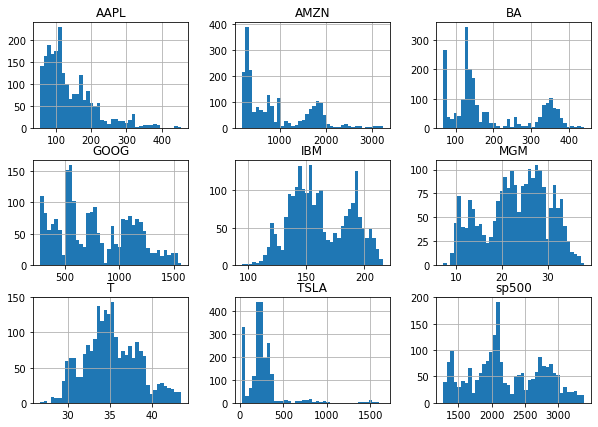

In [6]:
stocks_data.hist(figsize = (10, 7), bins = 40);

### Basic insight into the dataset

In [7]:
stocks_data.shape

(2159, 10)

In [8]:
stocks_data.shape

(2159, 10)

In [9]:
stocks_data.shape

(2159, 10)

In [10]:
stocks_data.shape

(2159, 10)

In [11]:
stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


### Let use plotly express to visualize the raw stocks  data and normalize ones

**We define a function**

In [12]:
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [13]:
# Function to plot interactive plot
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [14]:
# Plot interactive chart
interactive_plot(stocks_data, 'Prices')

In [15]:
# interactive_plot(normalize(stocks_data), "Normalized Prices")
# Plot normalized interactive chart
interactive_plot(normalize(stocks_data), 'Normalized Prices')

### Let Understand the Concept of Asset Allocation

### Let assume we have $1m dollars to invest

### We will start with random weight for  all the 9 stocks listed below

### Asset = [AAP, BA, T, MGM, AMZN, IBM, TSLA, GOOG, sp500]


### Weights = [10.92%, 12.06%, 0.602%, 3.627%, 14.492%, 17.636%, 6.492%, 18.89%, 15.2599%]

**15.2599% * $1,000,000 = $152,599**

### What is the common advice that financial advisors generally give to retired seniors when it comes to asset allocations?

##### The conventional wisdom is to subtract client's age from 100 to calculate the
##### % of portolio that should be allocated to stocks
##### For Example: If you're 40 years old, you should have 60% allocated to stocks

##### If you are 65 years old, you should invest 35% in stocks (old retired seniors 
##### generally recommend a more stable low risk portfolio).

# Perform Random Assest Allocation and Calculate Daily Returns Portfolio

In [16]:
# Let's create random portfolio weights
# Portfolio weights must sum to 1 

# Set random seed
# np.random.seed(101)
np.random.seed(101)

#Let create random weights for the stocks and normalise them
weights = np.array(np.random.random(9))

# ensure that the sum of all weights are = 1
weights = weights / np.sum(weights)

print(weights)

[0.10921307 0.12069041 0.00602201 0.03627509 0.14492913 0.17636073
 0.06492024 0.1889901  0.15259921]


## Let normalize the stock values

In [17]:
my_portfolio = normalize(stocks_data)
my_portfolio

Date      AAPL        BA         T       MGM       AMZN       IBM  \
0     2012-01-12  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
1     2012-01-13  0.996251  0.987949  0.998340  1.018137   1.014153  0.992301   
2     2012-01-17  1.007855  0.996424  1.004316  1.009893   1.032570  0.996954   
3     2012-01-18  1.018320  0.994040  1.006972  1.049464   1.076792  1.002880   
4     2012-01-19  1.015093  1.000662  1.009960  1.055235   1.105269  0.999834   
...          ...       ...       ...       ...       ...        ...       ...   
2154  2020-08-05  7.313297  2.308039  0.991036  1.378401  18.217644  0.694821   
2155  2020-08-06  7.568452  2.280493  0.990704  1.521847  18.331155  0.698532   
2156  2020-08-07  7.383066  2.251622  0.996680  1.568838  18.004093  0.692107   
2157  2020-08-10  7.490377  2.375977  1.002656  1.784831  17.894390  0.704016   
2158  2020-08-11  7.267614  2.385512  1.002656  1.772465  17.510772  0.702022   

           TSLA      GOOG     sp500  
0      1.000000  1.000000  1.000000  
1      0.806726  0.992615  0.995052  
2      0.941593  0.998317  0.998587  
3      0.949027  1.005193  1.009680  
4      0.947257  1.015771  1.014666  
...         ...       ...       ...  
2154  52.567080  4.698347  2.568715  
2155  52.728494  4.782805  2.585226  
2156  51.423361  4.764919  2.586862  
2157  50.214865  4.770052  2.593956  
2158  48.650974  4.719740  2.573284  

[2159 rows x 10 columns]

In [18]:
weights

array([0.10921307, 0.12069041, 0.00602201, 0.03627509, 0.14492913,
       0.17636073, 0.06492024, 0.1889901 , 0.15259921])

In [19]:
my_portfolio.columns[1:]

Index(['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500'], dtype='object')

## Let enumerate to return values and counter as well

In [20]:
for counter, stock in enumerate(my_portfolio.columns[1:]):
    my_portfolio[stock] = my_portfolio[stock] * weights[counter]
    my_portfolio[stock] = my_portfolio[stock] * 1000000

In [21]:
my_portfolio

Date           AAPL             BA            T           MGM  \
0     2012-01-12  109213.072967  120690.407490  6022.010143  36275.090893   
1     2012-01-13  108803.583155  119235.914699  6012.013247  36933.006803   
2     2012-01-17  110070.940263  120258.850187  6048.001354  36633.954117   
3     2012-01-18  111213.896735  119971.149581  6063.996069  38069.407013   
4     2012-01-19  110861.418590  120770.317932  6081.990122  38278.743893   
...          ...            ...            ...          ...           ...   
2154  2020-08-05  798707.600095  278558.118654  5968.027783  50001.606220   
2155  2020-08-06  826573.895966  275233.575119  5966.028443  55205.122968   
2156  2020-08-07  806327.319584  271749.212299  6002.016551  56909.729263   
2157  2020-08-10  818047.125846  286757.593922  6038.004858  64744.906663   
2158  2020-08-11  793718.512304  287908.397945  6038.004858  64296.327633   

              AMZN            IBM          TSLA           GOOG          sp500  
0     1.449291e+05  176360.729910  6.492024e+04  188990.104235  152599.209597  
1     1.469804e+05  175002.982837  5.237283e+04  187594.381427  151844.160487  
2     1.496495e+05  175823.488543  6.112844e+04  188671.942595  152383.655881  
3     1.560585e+05  176868.668340  6.161103e+04  189971.620676  154076.322712  
4     1.601857e+05  176331.426972  6.149613e+04  191970.659033  154837.252810  
...            ...            ...           ...            ...            ...  
2154  2.640267e+06  122539.200612  3.412668e+06  887941.003611  391983.847760  
2155  2.656718e+06  123193.660569  3.423147e+06  903902.858806  394503.400529  
2156  2.609318e+06  122060.571958  3.338417e+06  900522.495854  394753.132817  
2157  2.593418e+06  124160.687803  3.259961e+06  901492.611827  395835.632149  
2158  2.537821e+06  123809.039849  3.158433e+06  891984.169418  392681.165603  

[2159 rows x 10 columns]

## Let us create an additional column that contains the sum of all dollar and values in the portfolio

In [22]:
# Let's create an additional column that contains the sum of all $ values in the portfolio
my_portfolio['portfolio daily worth in $'] = my_portfolio[my_portfolio != 'Date'].sum(axis = 1)
my_portfolio

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Date           AAPL             BA            T           MGM  \
0     2012-01-12  109213.072967  120690.407490  6022.010143  36275.090893   
1     2012-01-13  108803.583155  119235.914699  6012.013247  36933.006803   
2     2012-01-17  110070.940263  120258.850187  6048.001354  36633.954117   
3     2012-01-18  111213.896735  119971.149581  6063.996069  38069.407013   
4     2012-01-19  110861.418590  120770.317932  6081.990122  38278.743893   
...          ...            ...            ...          ...           ...   
2154  2020-08-05  798707.600095  278558.118654  5968.027783  50001.606220   
2155  2020-08-06  826573.895966  275233.575119  5966.028443  55205.122968   
2156  2020-08-07  806327.319584  271749.212299  6002.016551  56909.729263   
2157  2020-08-10  818047.125846  286757.593922  6038.004858  64744.906663   
2158  2020-08-11  793718.512304  287908.397945  6038.004858  64296.327633   

              AMZN            IBM          TSLA           GOOG          sp500  \
0     1.449291e+05  176360.729910  6.492024e+04  188990.104235  152599.209597   
1     1.469804e+05  175002.982837  5.237283e+04  187594.381427  151844.160487   
2     1.496495e+05  175823.488543  6.112844e+04  188671.942595  152383.655881   
3     1.560585e+05  176868.668340  6.161103e+04  189971.620676  154076.322712   
4     1.601857e+05  176331.426972  6.149613e+04  191970.659033  154837.252810   
...            ...            ...           ...            ...            ...   
2154  2.640267e+06  122539.200612  3.412668e+06  887941.003611  391983.847760   
2155  2.656718e+06  123193.660569  3.423147e+06  903902.858806  394503.400529   
2156  2.609318e+06  122060.571958  3.338417e+06  900522.495854  394753.132817   
2157  2.593418e+06  124160.687803  3.259961e+06  901492.611827  395835.632149   
2158  2.537821e+06  123809.039849  3.158433e+06  891984.169418  392681.165603   

      portfolio daily worth in $  
0                   1.000000e+06  
1                   9.847792e+05  
2                   1.000669e+06  
3                   1.013905e+06  
4                   1.020814e+06  
...                          ...  
2154                8.588634e+06  
2155                8.664444e+06  
2156                8.506059e+06  
2157                8.450456e+06  
2158                8.256690e+06  

[2159 rows x 11 columns]

### Let's calculate the portfolio daily return 

### Define a new column in the dataframe and set it to zeros

In [23]:
# Let's calculate the portfolio daily return 
# Define a new column in the dataframe and set it to zeros
my_portfolio['portfolio daily % return'] = 0.0000

for i in range(1, len(stocks_data)):
  # Calculate the percentage of change from the previous day
  my_portfolio['portfolio daily % return'][i] = ( (my_portfolio['portfolio daily worth in $'][i] - my_portfolio['portfolio daily worth in $'][i-1]) / my_portfolio['portfolio daily worth in $'][i-1]) * 100 

my_portfolio   

Date           AAPL             BA            T           MGM  \
0     2012-01-12  109213.072967  120690.407490  6022.010143  36275.090893   
1     2012-01-13  108803.583155  119235.914699  6012.013247  36933.006803   
2     2012-01-17  110070.940263  120258.850187  6048.001354  36633.954117   
3     2012-01-18  111213.896735  119971.149581  6063.996069  38069.407013   
4     2012-01-19  110861.418590  120770.317932  6081.990122  38278.743893   
...          ...            ...            ...          ...           ...   
2154  2020-08-05  798707.600095  278558.118654  5968.027783  50001.606220   
2155  2020-08-06  826573.895966  275233.575119  5966.028443  55205.122968   
2156  2020-08-07  806327.319584  271749.212299  6002.016551  56909.729263   
2157  2020-08-10  818047.125846  286757.593922  6038.004858  64744.906663   
2158  2020-08-11  793718.512304  287908.397945  6038.004858  64296.327633   

              AMZN            IBM          TSLA           GOOG          sp500  \
0     1.449291e+05  176360.729910  6.492024e+04  188990.104235  152599.209597   
1     1.469804e+05  175002.982837  5.237283e+04  187594.381427  151844.160487   
2     1.496495e+05  175823.488543  6.112844e+04  188671.942595  152383.655881   
3     1.560585e+05  176868.668340  6.161103e+04  189971.620676  154076.322712   
4     1.601857e+05  176331.426972  6.149613e+04  191970.659033  154837.252810   
...            ...            ...           ...            ...            ...   
2154  2.640267e+06  122539.200612  3.412668e+06  887941.003611  391983.847760   
2155  2.656718e+06  123193.660569  3.423147e+06  903902.858806  394503.400529   
2156  2.609318e+06  122060.571958  3.338417e+06  900522.495854  394753.132817   
2157  2.593418e+06  124160.687803  3.259961e+06  901492.611827  395835.632149   
2158  2.537821e+06  123809.039849  3.158433e+06  891984.169418  392681.165603   

      portfolio daily worth in $  portfolio daily % return  
0                   1.000000e+06                  0.000000  
1                   9.847792e+05                 -1.522076  
2                   1.000669e+06                  1.613507  
3                   1.013905e+06                  1.322705  
4                   1.020814e+06                  0.681427  
...                          ...                       ...  
2154                8.588634e+06                  0.879605  
2155                8.664444e+06                  0.882669  
2156                8.506059e+06                 -1.827981  
2157                8.450456e+06                 -0.653686  
2158                8.256690e+06                 -2.292973  

[2159 rows x 12 columns]

## Let try atleast 3 random wait allocation and rerun the code

**Let Compare the final portfolio value on Aug 11th, 2020 to its initial value ($1M) on January 12th, 2012. Do you notice a big difference? Comment on your answer**

### remove the seed value of 101, run the code 3 times, and record the final portolio value on the last day (Aug 11th, 2020)
**np.random.seed()**

### Portfolio Value Run #1 = $6.383645e+06, **weights = [0.01246531 0.23749173 0.18257962 0.03419922** 0.08369018**0.23405306**
 **0.07120053 0.00824087 0.13607948]**

**Portfolio Value Run #2** = **$9.594104e+06**, **Weights** = **[0.13932903 0.04729773 0.15580758 0.03232255 0.0629491  0.15081605
 0.12206726 0.16938746 0.12002324]**

### Portfolio Value Run #3 = 1.138105e+07, Weights = [0.17707261 0.06977804 0.02394314 0.1550952  0.11152213 0.12017452
 **0.14296447 0.05729485 0.14215505]**

## PORTFOLIO ALLOCATION - DAILY RETURN / WORTH CALCULATION (FUNCTION)

Let assume we have $1,000, 000 to be invested and we will allocate this found based on the weights of the stocks

we will create a function that takes in the stock prices along with weights and return:

(1) Daily value of each individual securuty in $ over the specified time period

(2) Overall daily worth of the entire portfolio 

(3) Daily return

In [24]:
def portfolio_allocation(df, weights):

  my_portfolio = df.copy()
  
  # Normalize the stock avalues 
  my_portfolio = normalize(my_portfolio)
  
  for counter, stock in enumerate(my_portfolio.columns[1:]):
    my_portfolio[stock] = my_portfolio[stock] * weights[counter]
    my_portfolio[stock] = my_portfolio[stock] * 1000000

  my_portfolio['portfolio daily worth in $'] = my_portfolio[my_portfolio != 'Date'].sum(axis = 1)
  
  my_portfolio['portfolio daily % return'] = 0.0000

  for i in range(1, len(stocks_data)):
    
    # Calculate the percentage of change from the previous day
    my_portfolio['portfolio daily % return'][i] = ( (my_portfolio['portfolio daily worth in $'][i] - my_portfolio['portfolio daily worth in $'][i-1]) / my_portfolio['portfolio daily worth in $'][i-1]) * 100 
  
  # set the value of first row to zero, as previous value is not available
  my_portfolio['portfolio daily % return'][0] = 0
  return my_portfolio

## Let call the function

In [25]:
my_portfolio = portfolio_allocation(stocks_data, weights)
my_portfolio

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Date           AAPL             BA            T           MGM  \
0     2012-01-12  109213.072967  120690.407490  6022.010143  36275.090893   
1     2012-01-13  108803.583155  119235.914699  6012.013247  36933.006803   
2     2012-01-17  110070.940263  120258.850187  6048.001354  36633.954117   
3     2012-01-18  111213.896735  119971.149581  6063.996069  38069.407013   
4     2012-01-19  110861.418590  120770.317932  6081.990122  38278.743893   
...          ...            ...            ...          ...           ...   
2154  2020-08-05  798707.600095  278558.118654  5968.027783  50001.606220   
2155  2020-08-06  826573.895966  275233.575119  5966.028443  55205.122968   
2156  2020-08-07  806327.319584  271749.212299  6002.016551  56909.729263   
2157  2020-08-10  818047.125846  286757.593922  6038.004858  64744.906663   
2158  2020-08-11  793718.512304  287908.397945  6038.004858  64296.327633   

              AMZN            IBM          TSLA           GOOG          sp500  \
0     1.449291e+05  176360.729910  6.492024e+04  188990.104235  152599.209597   
1     1.469804e+05  175002.982837  5.237283e+04  187594.381427  151844.160487   
2     1.496495e+05  175823.488543  6.112844e+04  188671.942595  152383.655881   
3     1.560585e+05  176868.668340  6.161103e+04  189971.620676  154076.322712   
4     1.601857e+05  176331.426972  6.149613e+04  191970.659033  154837.252810   
...            ...            ...           ...            ...            ...   
2154  2.640267e+06  122539.200612  3.412668e+06  887941.003611  391983.847760   
2155  2.656718e+06  123193.660569  3.423147e+06  903902.858806  394503.400529   
2156  2.609318e+06  122060.571958  3.338417e+06  900522.495854  394753.132817   
2157  2.593418e+06  124160.687803  3.259961e+06  901492.611827  395835.632149   
2158  2.537821e+06  123809.039849  3.158433e+06  891984.169418  392681.165603   

      portfolio daily worth in $  portfolio daily % return  
0                   1.000000e+06                  0.000000  
1                   9.847792e+05                 -1.522076  
2                   1.000669e+06                  1.613507  
3                   1.013905e+06                  1.322705  
4                   1.020814e+06                  0.681427  
...                          ...                       ...  
2154                8.588634e+06                  0.879605  
2155                8.664444e+06                  0.882669  
2156                8.506059e+06                 -1.827981  
2157                8.450456e+06                 -0.653686  
2158                8.256690e+06                 -2.292973  

[2159 rows x 12 columns]

## Let Perform Portfolio Data Visualization

In [26]:
# Plot the portfolio daily return

plt = px.line(x =my_portfolio.Date, y= my_portfolio["portfolio daily % return"], title = "Portfolio The daily return")
plt.show()

## Plot the all stock(normalize)

In [27]:
interactive_plot(my_portfolio.drop(["portfolio daily worth in $", "portfolio daily % return"], axis = 1), "portfolio of everybody stocks")

## Let print out the histograme for daily return

In [28]:
fig = px.histogram(my_portfolio,  x = "portfolio daily % return")
fig.show()

## Plot the portfolio overall daily worth vs time

## return the code with verious weights and visualize the final value i.e rerun with random weight allocation

In [29]:

plt = px.line(x =my_portfolio.Date, y= my_portfolio["portfolio daily worth in $"], title = "Portfolio overall value in $")
plt.show()

## Calculate Portfolio Statisical Metrics(Cummulative Return, Average Daily Return, And Sharpe Ratio)

In [30]:
my_portfolio

Date           AAPL             BA            T           MGM  \
0     2012-01-12  109213.072967  120690.407490  6022.010143  36275.090893   
1     2012-01-13  108803.583155  119235.914699  6012.013247  36933.006803   
2     2012-01-17  110070.940263  120258.850187  6048.001354  36633.954117   
3     2012-01-18  111213.896735  119971.149581  6063.996069  38069.407013   
4     2012-01-19  110861.418590  120770.317932  6081.990122  38278.743893   
...          ...            ...            ...          ...           ...   
2154  2020-08-05  798707.600095  278558.118654  5968.027783  50001.606220   
2155  2020-08-06  826573.895966  275233.575119  5966.028443  55205.122968   
2156  2020-08-07  806327.319584  271749.212299  6002.016551  56909.729263   
2157  2020-08-10  818047.125846  286757.593922  6038.004858  64744.906663   
2158  2020-08-11  793718.512304  287908.397945  6038.004858  64296.327633   

              AMZN            IBM          TSLA           GOOG          sp500  \
0     1.449291e+05  176360.729910  6.492024e+04  188990.104235  152599.209597   
1     1.469804e+05  175002.982837  5.237283e+04  187594.381427  151844.160487   
2     1.496495e+05  175823.488543  6.112844e+04  188671.942595  152383.655881   
3     1.560585e+05  176868.668340  6.161103e+04  189971.620676  154076.322712   
4     1.601857e+05  176331.426972  6.149613e+04  191970.659033  154837.252810   
...            ...            ...           ...            ...            ...   
2154  2.640267e+06  122539.200612  3.412668e+06  887941.003611  391983.847760   
2155  2.656718e+06  123193.660569  3.423147e+06  903902.858806  394503.400529   
2156  2.609318e+06  122060.571958  3.338417e+06  900522.495854  394753.132817   
2157  2.593418e+06  124160.687803  3.259961e+06  901492.611827  395835.632149   
2158  2.537821e+06  123809.039849  3.158433e+06  891984.169418  392681.165603   

      portfolio daily worth in $  portfolio daily % return  
0                   1.000000e+06                  0.000000  
1                   9.847792e+05                 -1.522076  
2                   1.000669e+06                  1.613507  
3                   1.013905e+06                  1.322705  
4                   1.020814e+06                  0.681427  
...                          ...                       ...  
2154                8.588634e+06                  0.879605  
2155                8.664444e+06                  0.882669  
2156                8.506059e+06                 -1.827981  
2157                8.450456e+06                 -0.653686  
2158                8.256690e+06                 -2.292973  

[2159 rows x 12 columns]

## commulative return of the portfolio

In [31]:
my_portfolio["portfolio daily worth in $"][-1:]

2158    8.256690e+06
Name: portfolio daily worth in $, dtype: float64

In [32]:
cummulative_return = ((my_portfolio['portfolio daily worth in $'][-1:] - my_portfolio['portfolio daily worth in $'][0])/ my_portfolio['portfolio daily worth in $'][0]) * 100
print('Cummulative return of the portfolio is {} %'.format(cummulative_return.values[0]))

Cummulative return of the portfolio is 725.6689577819229 %


In [33]:
# Calculate the portfolio standard deviation
print('Standard deviation of the portfolio is {}'.format(my_portfolio['portfolio daily % return'].std()))

Standard deviation of the portfolio is 1.4491482034679348


In [34]:
# Calculate the average daily return 
print('Average daily return of the portfolio is {} %'.format(my_portfolio['portfolio daily % return'].mean() ))

Average daily return of the portfolio is 0.10836656759421495 %


In [35]:
# Portfolio sharpe ratio
sharpe_ratio = my_portfolio['portfolio daily % return'].mean() / my_portfolio['portfolio daily % return'].std() * np.sqrt(252)
print('Sharpe ratio of the portfolio is {}'.format(sharpe_ratio))

Sharpe ratio of the portfolio is 1.1870876461158633


**Let rerun the code to see random weights values**